## Importing packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.preprocessing import label_binarize

## Reading data

The 'census.csv' file contains all the data.

In [2]:
census_data = pd.read_csv('census.csv')
census_data.head(15)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


It can be observed that there are some entries with a '?' indicating missing values. This is handled in the data cleaning phase.

In [3]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### Setting all object types to categorical type

In [4]:
census_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
for col in set(census_data.columns) - set(census_data.describe().columns):
    census_data[col] = census_data[col].astype('category')
    
print('Coumns and their data types')
print(census_data.info())

Coumns and their data types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  int64   
 1   workclass       48842 non-null  category
 2   fnlwgt          48842 non-null  int64   
 3   education       48842 non-null  category
 4   education-num   48842 non-null  int64   
 5   marital-status  48842 non-null  category
 6   occupation      48842 non-null  category
 7   relationship    48842 non-null  category
 8   race            48842 non-null  category
 9   sex             48842 non-null  category
 10  capital-gain    48842 non-null  int64   
 11  capital-loss    48842 non-null  int64   
 12  hours-per-week  48842 non-null  int64   
 13  native-country  48842 non-null  category
 14  income          48842 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.7 MB
None


## Data cleaning

### Checking if there are any null columns

In [6]:
census_data.sum().isnull()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
income            False
dtype: bool

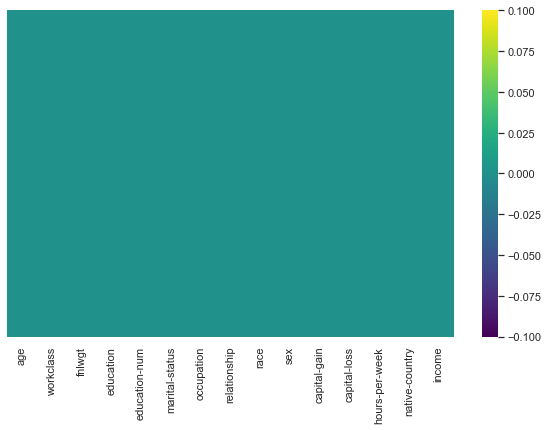

In [7]:
sns.set(rc={'figure.figsize':(10,6)})
sns.heatmap(census_data.isnull(), yticklabels=False ,cmap="viridis")
plt.show()

It can be seen from the heatmap above that the number of null values in each column is zero. Hence, there are no null values in the dataset. 

### Checking if there are any missing values

In [8]:
print("Missing values present in the following attributes:")
print("---------------------------------------------------")
for x,y in zip(census_data.columns,(census_data.values.astype(str) == '?').sum(axis = 0)):
    if y > 0:
        print("{0} = {1} records".format(str(x), str(y)))

Missing values present in the following attributes:
---------------------------------------------------
workclass = 2799 records
occupation = 2809 records
native-country = 857 records


In [9]:
dataCheck = census_data[census_data['workclass'] != '?']

In [10]:
print("Missing values present in the following attributes:")
print("---------------------------------------------------")
for x,y in zip(dataCheck.columns,(dataCheck.values.astype(str) == '?').sum(axis = 0)):
    if y > 0:
        print("{0} = {1} records".format(str(x), str(y)))

Missing values present in the following attributes:
---------------------------------------------------
occupation = 10 records
native-country = 811 records


When tried to remove the rows with missing values in 'workclass', it resulted that the missing values in 'occupation' are also removed. Thus, it is implied that whenever 'workclass' is unknown, then occupation is unknown too.

### Using imputation methods to predict the missing values

The number of missing values in workclass and occupation columns seems almost equal. This means that whenever workclass is unknown, occupation is unknown too. These missing values can be filled by using all attributes as independent variables and performing multi class classification and then predicting the missing items.

In [11]:
def oneHotEncoding(dataframe, columns_dataframe):
    
    dataframe1 = dataframe.drop(columns = columns_dataframe, axis = 1)
    dataframe2 = pd.get_dummies(dataframe[columns_dataframe])
    
    return (pd.concat([dataframe1, dataframe2], axis=1, join='inner'))

#### Dropping the rows with missing values in 'native-country' column

To get a proper analysis, it is essential that the rows with missing values in 'native-country' to be dropped rather than replacing them. It is not reasonable to predict the missing values in the country column based on the data available. Also, 
by removing entries with missing values in 'native-country' column, we only lose 1.75% of the total data which is considerable for the problem at hand.

In [12]:
census_data = census_data[census_data['native-country'] != '?']

#### Filling missing values in 'occupation' column

In [13]:
test_data = census_data[(census_data.occupation.values == '?')].copy()
test_label = test_data.occupation

train_data = census_data[(census_data.occupation.values != '?')].copy()
train_label = train_data.occupation

test_data.drop(columns = ['occupation'], inplace = True)
train_data.drop(columns = ['occupation'], inplace = True)

train_data = oneHotEncoding(train_data, train_data.select_dtypes('category').columns)
test_data = oneHotEncoding(test_data, test_data.select_dtypes('category').columns)

log_reg = LogisticRegression()
log_reg.fit(train_data, train_label)
log_reg_pred = log_reg.predict(test_data)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_label)
clf_pred = clf.predict(test_data)

r_forest = RandomForestClassifier(n_estimators=10)
r_forest.fit(train_data, train_label)
r_forest_pred = r_forest.predict(test_data)

majority_class = census_data.occupation.value_counts().index[0]

pred_df =  pd.DataFrame({'RFor': r_forest_pred, 'DTree' : clf_pred, 'LogReg' : log_reg_pred})
overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1 else majority_class, axis = 1)

census_data.loc[(census_data.occupation.values == '?'),'occupation'] = overall_pred.values
print(census_data.occupation.value_counts())
print(census_data.occupation.unique())

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Craft-repair         7926
Prof-specialty       6140
Exec-managerial      6051
Adm-clerical         5888
Sales                5411
Other-service        5032
Machine-op-inspct    2972
Transport-moving     2327
Handlers-cleaners    2054
Farming-fishing      1535
Tech-support         1424
Protective-serv       979
Priv-house-serv       232
Armed-Forces           14
?                       0
Name: occupation, dtype: int64
[Machine-op-inspct, Farming-fishing, Protective-serv, Adm-clerical, Other-service, ..., Sales, Priv-house-serv, Transport-moving, Handlers-cleaners, Armed-Forces]
Length: 14
Categories (14, object): [Machine-op-inspct, Farming-fishing, Protective-serv, Adm-clerical, ..., Priv-house-serv, Transport-moving, Handlers-cleaners, Armed-Forces]


#### Filling missing values in 'workclass' column

In [14]:
test_data = census_data[(census_data.workclass.values == '?')].copy()
test_label = test_data.workclass

train_data = census_data[(census_data.workclass.values != '?')].copy()
train_label = train_data.workclass

test_data.drop(columns = ['workclass'], inplace = True)
train_data.drop(columns = ['workclass'], inplace = True)

train_data = oneHotEncoding(train_data, train_data.select_dtypes('category').columns)
test_data = oneHotEncoding(test_data, test_data.select_dtypes('category').columns)

log_reg = LogisticRegression()
log_reg.fit(train_data, train_label)
log_reg_pred = log_reg.predict(test_data)


clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_label)
clf_pred = clf.predict(test_data)

r_forest = RandomForestClassifier(n_estimators=10)
r_forest.fit(train_data, train_label)
r_forest_pred = r_forest.predict(test_data)

majority_class = census_data.workclass.value_counts().index[0]

pred_df =  pd.DataFrame({'RFor': r_forest_pred, 'DTree' : clf_pred, 'LogReg' : log_reg_pred})
overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1 else majority_class, axis = 1)

census_data.loc[(census_data.workclass.values == '?'),'workclass'] = overall_pred.values
print(census_data.workclass.value_counts())
print(census_data.workclass.unique())

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Private             35858
Self-emp-not-inc     3932
Local-gov            3133
State-gov            1960
Self-emp-inc         1655
Federal-gov          1407
Without-pay            21
Never-worked           19
?                       0
Name: workclass, dtype: int64
[Private, Local-gov, Self-emp-not-inc, Federal-gov, State-gov, Self-emp-inc, Without-pay, Never-worked]
Categories (8, object): [Private, Local-gov, Self-emp-not-inc, Federal-gov, State-gov, Self-emp-inc, Without-pay, Never-worked]


Now the data is free from null and missing values. Thus the data cleaning process has been done and we'll move onto EDA.

In [15]:
census_data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,9,Never-married,Craft-repair,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


## Removing unnecessary attributes

In [16]:
# census_data.drop(columns = ['education','fnlwgt'], inplace = True)

The two attributes 'education' and 'education-num' convey the same meaning. So the column education is being dropped. Also 'fnlwgt' can be dropped as it indicates the number of people the census believes the entry represents and does not convey information related to any individual.

In [17]:
census_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K


## Exploratory Data Analysis

### Data distribution on various attributes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19c382d0>,
      dtype=object)

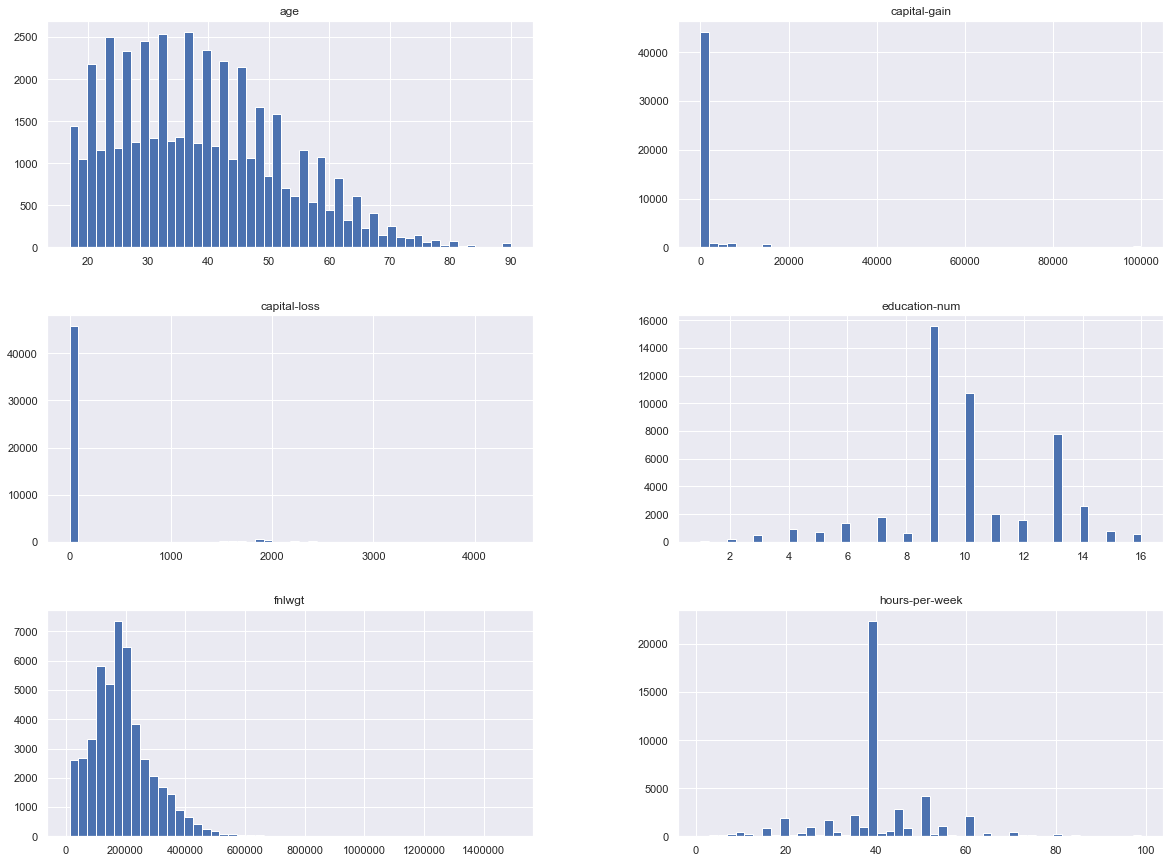

In [18]:
census_data.hist(bins=50, figsize=(20,15))

The above plot shows the distribution of data among several numerical attributes. For the ‘age’ attribute, the data is highly populated. In case of ‘capital-gain’ and ‘capital-loss’, the data is highly concentrated for one particular value. It can be seen that the number of entries is maximum for people working for 40 hours per week.

### Finding out the relation between various attributes

In order to find how all the attributes are related to income, 'income' has to be converted to numerical type. This would help in getting a correlation matrix so as to find some insights.

Getting the values of 'income' attribute. They are found to be categoical.

In [19]:
# income_to_numerical_data = census_data
# income_to_numerical_data['income'].unique()

Converting categorical values to numerical i.e., 0 if income < 50k (or) 1 if income >= 50k

In [20]:
# income_to_numerical_data['income'] = income_to_numerical_data['income'].apply(lambda i: 1 if i=='>50K' else 0)

Converted the 'income' values to 0 or 1

In [21]:
# income_to_numerical_data['income'].unique()

In [22]:
# income_to_numerical_data.head()

Correlation Matrix
------------------


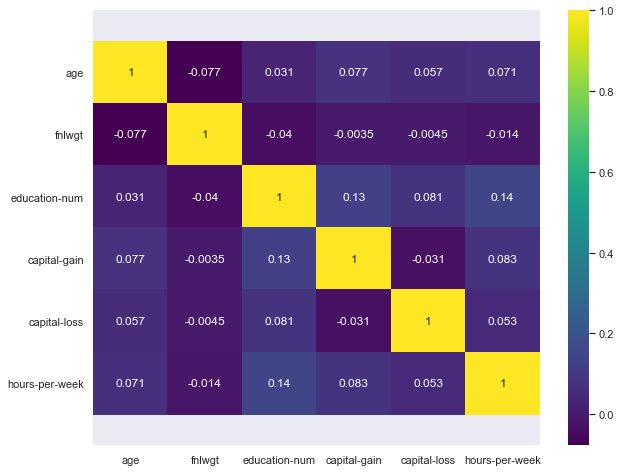

In [23]:
print("Correlation Matrix")
print("------------------")

results = census_data.corr()
plt.subplots(figsize=(10,8))
ax = sns.heatmap(results,annot = True, cmap="viridis")
bottom, top = ax.get_ylim()
ax = ax.set_ylim(bottom + 0.5, top - 0.5)

Good correlations exists between 
i)  age and hours per week
ii) capital gain and hours per week

Moderate correlation exists between
i)  capital loss and age

### Age vs Income

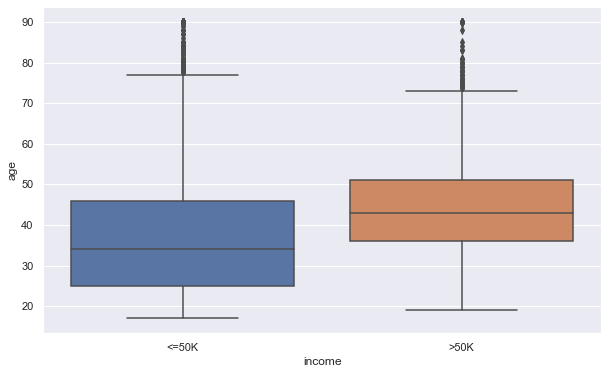

In [24]:
sns.boxplot(y='age',x='income',data=census_data)

We can observe that the median age for people earning less than $50k is significantly lower than the median age of people earning more than $50k. So, older people are more likely to earn more than $50k a year as compared to their younger counterparts. This might be due to seniority of employees and their experience in a particular field.


### Hours-per-week vs Income

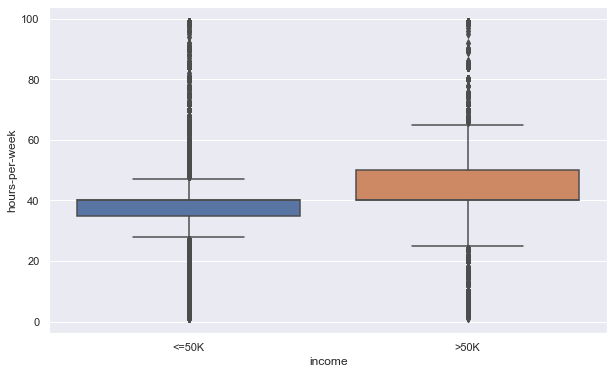

In [25]:
sns.boxplot(y='hours-per-week',x='income',data=census_data)

This plot shows that the people who put more time per week into their work, appear to earn more. The interquartile range is also observed to be much smaller for those who earn less. This indicates that people who earn less than $50k per year have less spread in the hours they work per week. The medians working hours per week of both the classes was observed to be 40 hours. However, the median of the income class that earns less than <=50k coincides with it’s Q3 and the median of the class that earns >50k coincides with it’s Q1.

There are many outliers in both groups which represent high variations in both these groups. This makes sense, since there are some hectic jobs that pay less and some easy jobs that pay more.

### Capital-gain vs Income

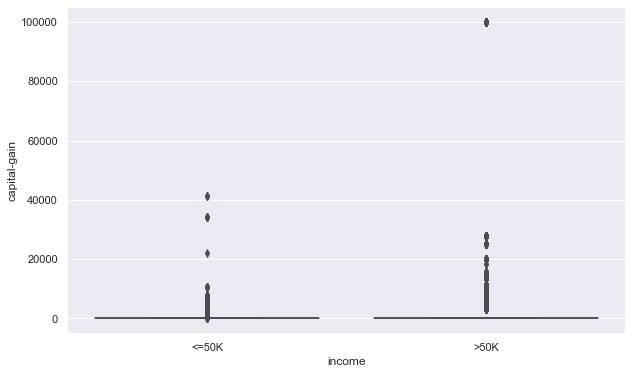

In [26]:
sns.boxplot(y='capital-gain',x='income',data=census_data)

### Capital-loss vs Income

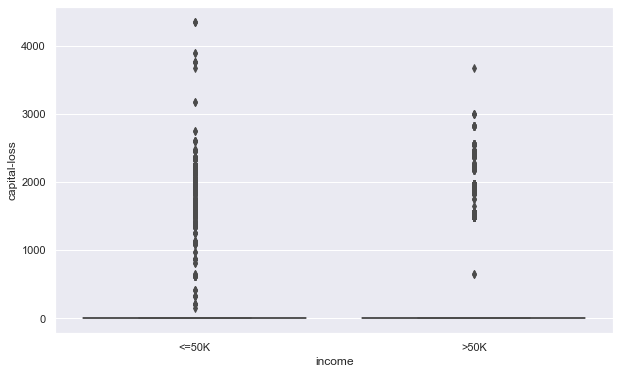

In [27]:
sns.boxplot(y='capital-loss',x='income',data=census_data)

#### We used box plots because they help in finding outliers easily

### Education vs Proportion of population with an income

In [28]:
educationLevel = {}
for x,y in census_data[['education-num','education']].drop_duplicates().itertuples(index=False):
    educationLevel[y] = x

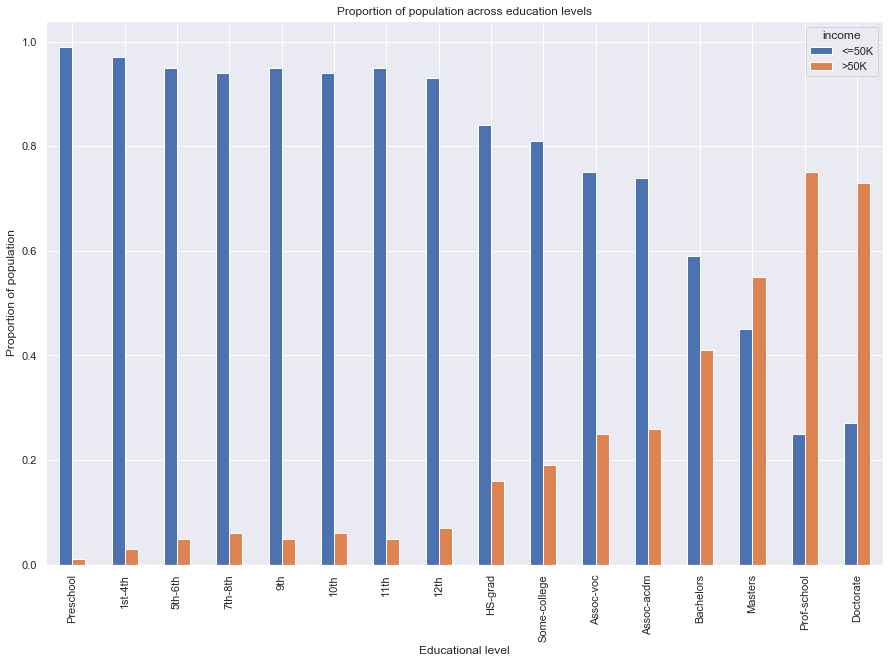

In [29]:
education = round(pd.crosstab(census_data.education, census_data.income).div(pd.crosstab(census_data.education, census_data.income).apply(sum,1),0),2)
education = education.reindex(sorted(educationLevel, key=educationLevel.get, reverse=False))

ax = education.plot(kind ='bar', title = 'Proportion of population across education levels', figsize = (15,10))
t = ax.set_xlabel('Educational level')
t = ax.set_ylabel('Proportion of population')

The above plot shows the proportion of population falling into either >=50k or <50k income categories distributed across different educational levels. 

As we would expect, it can be seen from the chart that as the level of education increases, the proportion of population earning >50k annually also increases. The highest proportion of the population earning >50k annually are the ones with an education level of Prof-school or Doctorate.


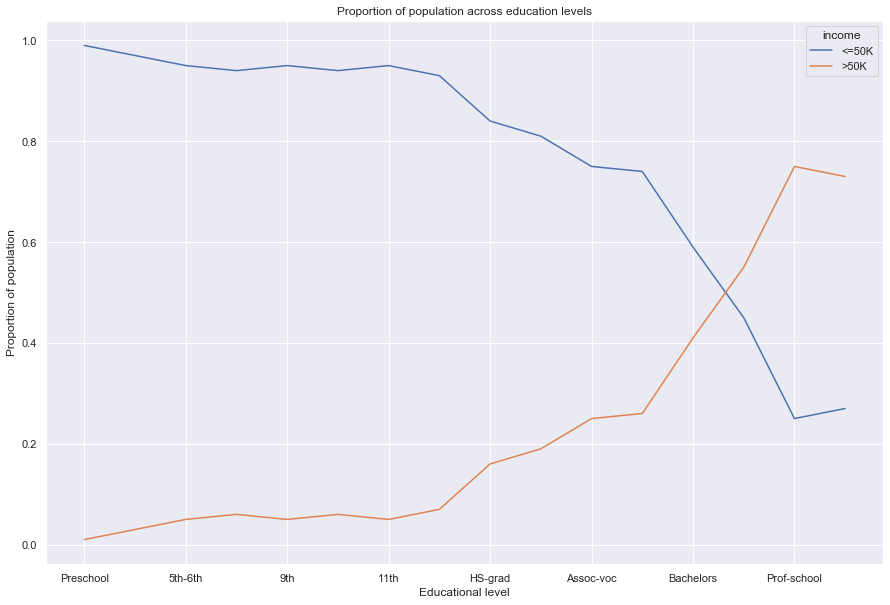

In [30]:
education = round(pd.crosstab(census_data.education, census_data.income).div(pd.crosstab(census_data.education, census_data.income).apply(sum,1),0),2)
education = education.reindex(sorted(educationLevel, key=educationLevel.get, reverse=False))

ax = education.plot(kind ='line', title = 'Proportion of population across education levels', figsize = (15,10))
t = ax.set_xlabel('Educational level')
t = ax.set_ylabel('Proportion of population')

 The intersection of two lines indicates that after Bachelors education (i.e., 14 years of education), more than 50 % of the people earn >50k anually. Only a small proportion of people till High School education level earn more than $50k anually. This proportion almost lineary keeps increasing till Bachelors.

### Workclass vs Proportion of population with an income

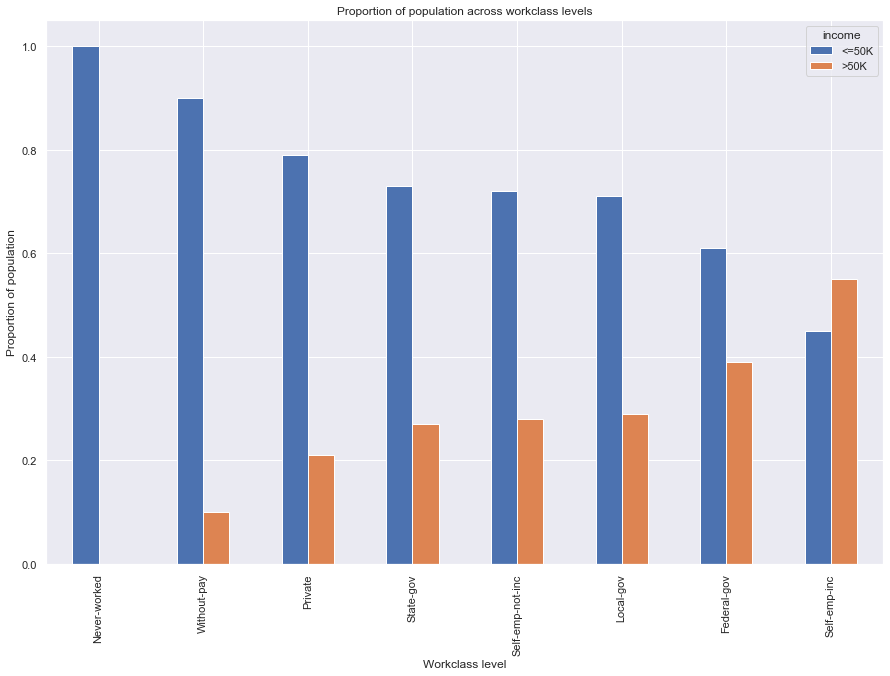

In [31]:
workclass = round(pd.crosstab(census_data.workclass, census_data.income).div(pd.crosstab(census_data.workclass, census_data.income).apply(sum,1),0),2)
workclass.sort_values(by = '>50K', inplace = True)
ax = workclass.plot(kind ='bar', title = 'Proportion of population across workclass levels', figsize = (15,10))
t = ax.set_xlabel('Workclass level')
t = ax.set_ylabel('Proportion of population')

print()

It can be seen that Self-emp-inc workclass has the highest proportion of people who earn >50k. A positive correlation can be drawn between people who earn more and people who are self-employed with incorporated businesses. Its time to start your own business!

### Occupation vs Proportion of population with an income

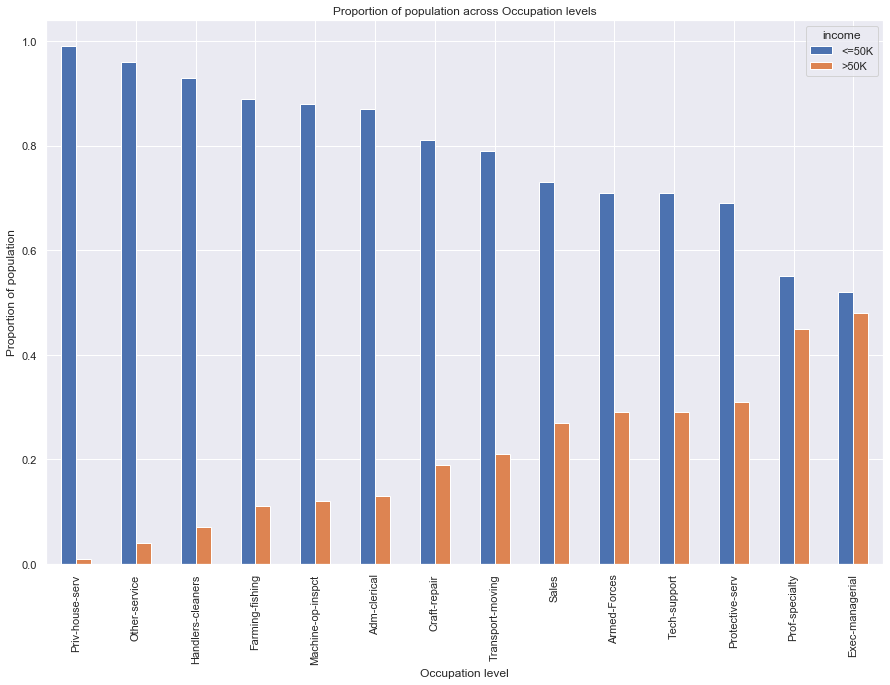

In [32]:
occupation = round(pd.crosstab(census_data.occupation, census_data.income).div(pd.crosstab(census_data.occupation, census_data.income).apply(sum,1),0),2)
occupation.sort_values(by = '>50K', inplace = True)
ax = occupation.plot(kind ='bar', title = 'Proportion of population across Occupation levels', figsize = (15,10))
t = ax.set_xlabel('Occupation level')
t = ax.set_ylabel('Proportion of population')

print()

It can be seen that higher proportion of population earn >50k if they are wither an executive manager or a professor with a specialisation. 

### Marital Status vs Proportion of population with an income

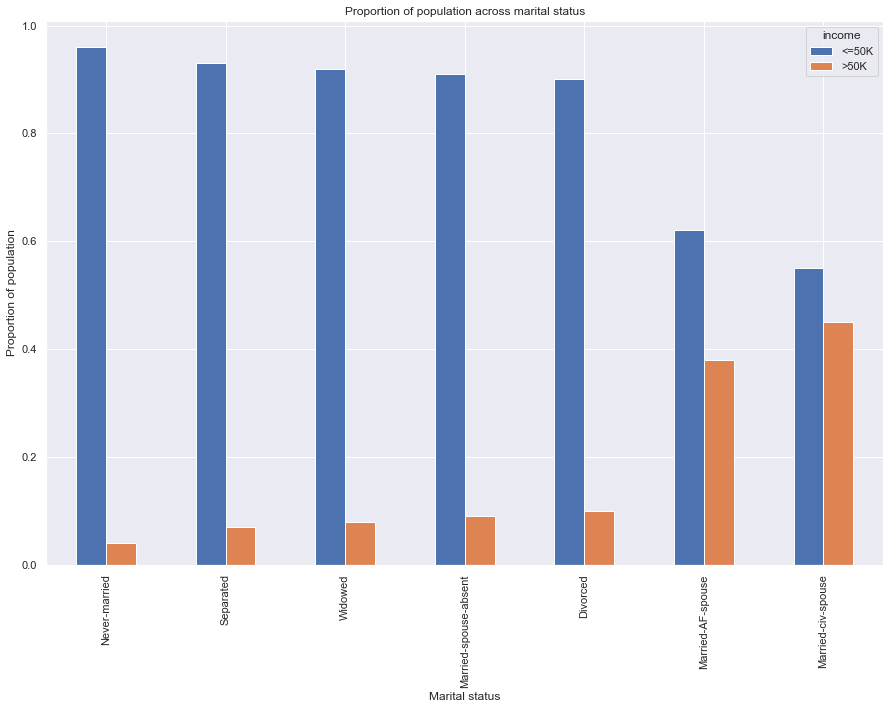

In [33]:
marital_status = round(pd.crosstab(census_data['marital-status'], census_data.income).div(pd.crosstab(census_data['marital-status'], census_data.income).apply(sum,1),0),2)
marital_status.sort_values(by = '>50K', inplace = True)
ax = marital_status.plot(kind ='bar', title = 'Proportion of population across marital status', figsize = (15,10))
t = ax.set_xlabel('Marital status')
t = ax.set_ylabel('Proportion of population')

print()

Most of the unmarried proportion of the population earns <=50k anually. However, people that are married to those in the armed forces or civil are likely to have their annual income to exceed $50k. 

### Gender vs Proportion of population with an income

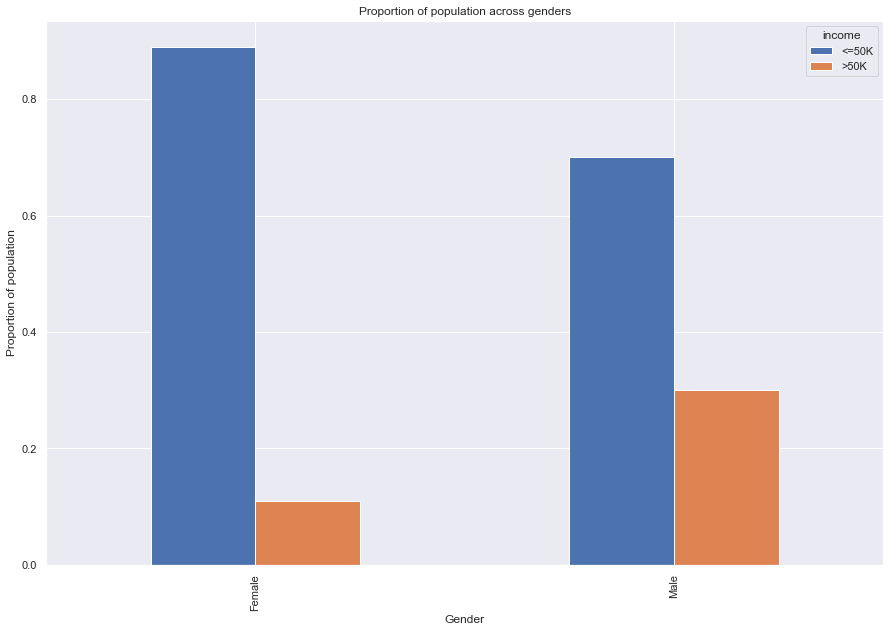

In [34]:
gender = round(pd.crosstab(census_data['sex'], census_data.income).div(pd.crosstab(census_data['sex'], census_data.income).apply(sum,1),0),2)
gender.sort_values(by = '>50K', inplace = True)
ax = gender.plot(kind ='bar', title = 'Proportion of population across genders', figsize = (15,10))
t = ax.set_xlabel('Gender')
t = ax.set_ylabel('Proportion of population')

print()

It can be seen from the graphs that men are thrice as likely to earn >50k annually than women. 

### Race proportion for each income category

In [35]:
census_data_greater50k = census_data[(census_data.income.values == '>50K')].copy()
census_data_lesser50k = census_data[(census_data.income.values == '<=50K')].copy()

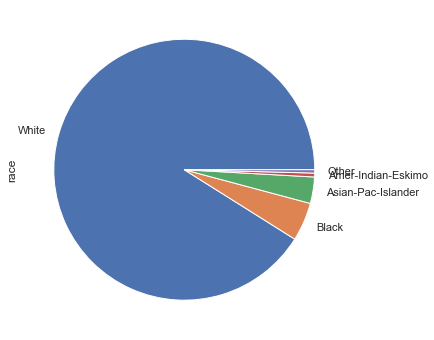

In [36]:
census_data_greater50k['race'].value_counts().plot(kind='pie')

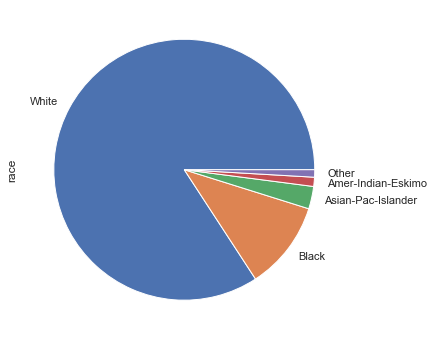

In [37]:
census_data_lesser50k['race'].value_counts().plot(kind='pie')

The first pie chart shows that the maximum proportion of entries that earn <=50K belong to white race. The second highest being the black followed by other races. It is the same trend for >50K as well. 

## Converting categorical variables into indicator variables

In [38]:
census_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K


In [39]:
workclass = pd.get_dummies(census_data["workclass"],drop_first=True)
workclass.head(2)

,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0


In [40]:
maritalstatus = pd.get_dummies(census_data["marital-status"],drop_first=True)
maritalstatus.head(2)

,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,0,0,0,1,0,0
1,0,1,0,0,0,0


In [41]:
education = pd.get_dummies(census_data["education"],drop_first=True)
education.head(2)

,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [42]:
occupation = pd.get_dummies(census_data["occupation"],drop_first=True)
occupation.head(2)

,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [43]:
relation = pd.get_dummies(census_data["relationship"],drop_first=True)
relation.head(2)

,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,0,0,1,0,0
1,0,0,0,0,0


In [44]:
sex = pd.get_dummies(census_data["sex"],drop_first=True)
sex.head(2)

,Male
0,1
1,1


In [45]:
census_data = pd.concat([census_data, workclass, maritalstatus, education, occupation, relation, sex], axis=1)
census_data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,Protective-serv,Sales,Tech-support,Transport-moving,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Male
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,...,0,0,0,0,0,0,1,0,0,1
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,...,0,0,0,0,0,0,0,0,0,1
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,...,1,0,0,0,0,0,0,0,0,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,...,0,0,0,0,0,0,0,0,0,1
4,18,Private,103497,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,...,0,0,0,0,0,0,1,0,0,0


In [46]:
census_data.drop(['workclass','education','marital-status','occupation','relationship','race','sex'],axis=1,inplace=True)

In [47]:
census_data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,native-country,income,Federal-gov,Local-gov,...,Protective-serv,Sales,Tech-support,Transport-moving,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Male
0,25,226802,7,0,0,40,United-States,<=50K,0,0,...,0,0,0,0,0,0,1,0,0,1
1,38,89814,9,0,0,50,United-States,<=50K,0,0,...,0,0,0,0,0,0,0,0,0,1
2,28,336951,12,0,0,40,United-States,>50K,0,1,...,1,0,0,0,0,0,0,0,0,1
3,44,160323,10,7688,0,40,United-States,>50K,0,0,...,0,0,0,0,0,0,0,0,0,1
4,18,103497,10,0,0,30,United-States,<=50K,0,0,...,0,0,0,0,0,0,1,0,0,0


In [48]:
census_data.drop(['native-country'],axis=1,inplace=True)
census_data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,Federal-gov,Local-gov,Never-worked,...,Protective-serv,Sales,Tech-support,Transport-moving,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Male
0,25,226802,7,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,38,89814,9,0,0,50,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,28,336951,12,0,0,40,>50K,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,44,160323,10,7688,0,40,>50K,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,18,103497,10,0,0,30,<=50K,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [49]:
X = census_data.drop('income',axis=1)
y = census_data['income']
y

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 47985, dtype: category
Categories (2, object): [<=50K, >50K]

### Binarizing class labels

In [50]:
census_data['income'] = census_data['income'].apply(lambda i: 1 if i=='>50K' else 0)

In [51]:
X = census_data.drop('income',axis=1)
y = census_data['income']
y

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 47985, dtype: category
Categories (2, int64): [0, 1]

In [52]:
from sklearn.metrics import confusion_matrix

def model_eval(actual, pred):
    
    TN, FP, FN, TP = confusion_matrix(actual, pred).ravel()

    accuracy = ((TP+TN))/(TP+FN+FP+TN)
    precision = (TP)/(TP+FP)
    recall = (TP)/(TP+FN)
    f_measure = (2*recall*precision)/(recall+precision)
    specificity = TN / (TN + FP)
    error_rate = 1 - accuracy
    
    metrics = {}
    metrics['accuracy'] =  accuracy
    metrics['precision'] = precision
    metrics['recall'] = recall
    metrics['f_measure'] = f_measure
    metrics['specificity'] = specificity
    metrics['error_rate'] = error_rate
    metrics['confusion_matrix'] = confusion_matrix(actual, pred)
    
    return metrics

In [53]:
from sklearn.model_selection import train_test_split, cross_val_score

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [55]:
X_train.shape

(38388, 55)

In [56]:
y_train.shape

(38388,)

In [57]:
X_test.shape

(9597, 55)

In [58]:
y_test.shape

(9597,)

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
lg = LogisticRegression()

In [61]:
lg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
lg_pred = lg.predict(X_test)

In [63]:
lg_metrics = model_eval(y_test, lg_pred)
lg_metrics

{'accuracy': 0.796603105137022,
 'precision': 0.717948717948718,
 'recall': 0.2546556951061065,
 'f_measure': 0.37595907928388744,
 'specificity': 0.9683040614709111,
 'error_rate': 0.20339689486297796,
 'confusion_matrix': array([[7057,  231],
        [1721,  588]])}

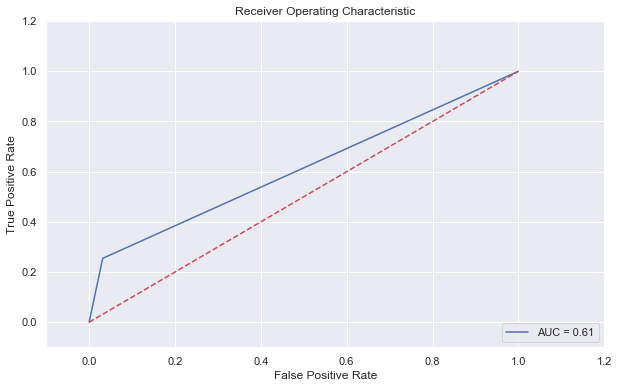

In [64]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, lg_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dt = DecisionTreeClassifier()

In [67]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [68]:
dt_pred = dt.predict(X_test)

In [69]:
dt_metrics = model_eval(y_test, dt_pred)
dt_metrics

{'accuracy': 0.8168177555486089,
 'precision': 0.6182911120652641,
 'recall': 0.6236466002598527,
 'f_measure': 0.6209573091849936,
 'specificity': 0.8780186608122942,
 'error_rate': 0.18318224445139109,
 'confusion_matrix': array([[6399,  889],
        [ 869, 1440]])}

In [70]:
# CV
scores = cross_val_score(dt, X_train, y_train, cv=7)
print(scores)
print('Test Accuracy with cv: ', scores.mean())

[0.81528082 0.81765135 0.80707513 0.81911014 0.81965718 0.81491612
 0.81801605]
Test Accuracy with cv:  0.8159581119099718


In [71]:
from sklearn.metrics import classification_report

In [72]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7288
           1       0.62      0.62      0.62      2309

    accuracy                           0.82      9597
   macro avg       0.75      0.75      0.75      9597
weighted avg       0.82      0.82      0.82      9597



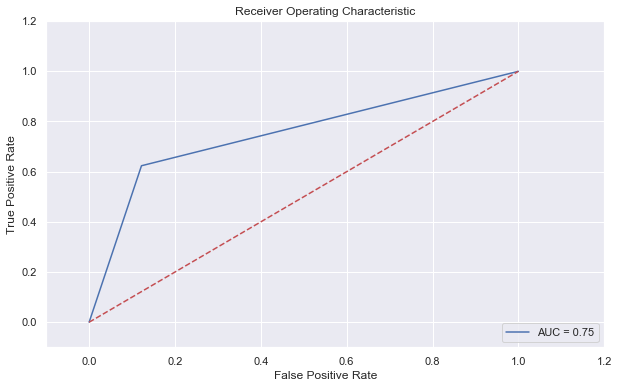

In [73]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, dt_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rfc = RandomForestClassifier(n_estimators=70, criterion='entropy', random_state=33, n_jobs=-1, max_features=50)

In [76]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=50,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
                       oob_score=False, random_state=33, verbose=0,
                       warm_start=False)

In [77]:
rfc_pred = rfc.predict(X_test)

In [78]:
rfc_metrics = model_eval(y_test, rfc_pred)
rfc_metrics

{'accuracy': 0.8577680525164114,
 'precision': 0.7440537745604964,
 'recall': 0.6232135123430056,
 'f_measure': 0.678293660146123,
 'specificity': 0.9320801317233809,
 'error_rate': 0.14223194748358858,
 'confusion_matrix': array([[6793,  495],
        [ 870, 1439]])}

In [79]:
# CV
scores = cross_val_score(rfc, X_train, y_train, cv=10)
print(scores)
print('Test Accuracy with cv: ', scores.mean())

[0.86819484 0.85022141 0.85022141 0.85230529 0.8504819  0.8622037
 0.85933837 0.85959885 0.85565399 0.86034393]
Test Accuracy with cv:  0.8568563687917576


In [80]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7288
           1       0.74      0.62      0.68      2309

    accuracy                           0.86      9597
   macro avg       0.82      0.78      0.79      9597
weighted avg       0.85      0.86      0.85      9597



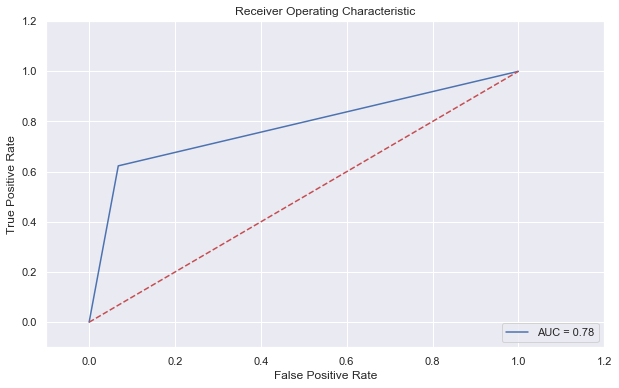

In [81]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rfc_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [82]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)

In [83]:
knn = KNeighborsClassifier()

In [84]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [85]:
knn_pred = knn.predict(X_test)

In [86]:
knn_metrics = model_eval(y_test, knn_pred)
knn_metrics

{'accuracy': 0.7760758570386579,
 'precision': 0.5597907324364724,
 'recall': 0.32438284971849285,
 'f_measure': 0.4107485604606526,
 'specificity': 0.9191822173435785,
 'error_rate': 0.2239241429613421,
 'confusion_matrix': array([[6699,  589],
        [1560,  749]])}

In [87]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      7288
           1       0.56      0.32      0.41      2309

    accuracy                           0.78      9597
   macro avg       0.69      0.62      0.64      9597
weighted avg       0.75      0.78      0.75      9597



In [88]:
scores = cross_val_score(knn, X_train, y_train, cv=10)
print(scores)
print('Test Accuracy: ', scores.mean())

[0.77624381 0.77389945 0.77858817 0.77780672 0.78015108 0.77910914
 0.78301641 0.78379786 0.76784784 0.78035435]
Test Accuracy:  0.7780814848186673


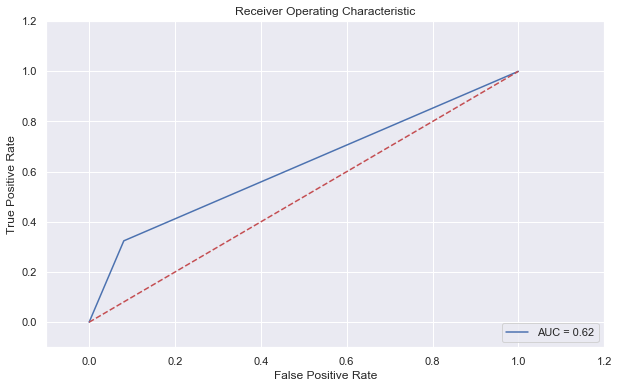

In [89]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, knn_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [90]:
from xgboost import XGBClassifier

In [91]:
xgb = XGBClassifier()

In [92]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [93]:
xgb_pred = xgb.predict(X_test)

In [94]:
xgb_metrics = model_eval(y_test, xgb_pred)
xgb_metrics

{'accuracy': 0.8637074085651766,
 'precision': 0.7928613224107666,
 'recall': 0.5868341273278476,
 'f_measure': 0.6744649079143852,
 'specificity': 0.9514270032930845,
 'error_rate': 0.13629259143482342,
 'confusion_matrix': array([[6934,  354],
        [ 954, 1355]])}

In [95]:
# CV
scores = cross_val_score(xgb, X_train, y_train, cv=5)
print(scores)
print(scores.mean())

[0.86389685 0.85647304 0.86975775 0.87234597 0.86413964]
0.8653226487524448


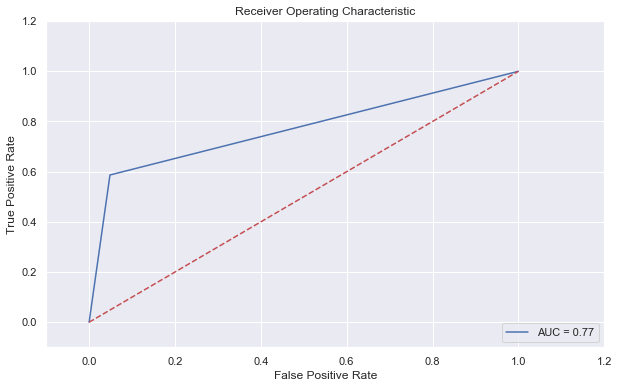

In [96]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, xgb_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [97]:
from sklearn.ensemble import GradientBoostingClassifier

In [98]:
gbc = GradientBoostingClassifier()

In [99]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [100]:
gbc_pred = gbc.predict(X_test)

In [101]:
gbc_metrics = model_eval(y_test, gbc_pred)
gbc_metrics

{'accuracy': 0.8670417838907992,
 'precision': 0.7926345609065156,
 'recall': 0.6058899956691208,
 'f_measure': 0.6867943053510065,
 'specificity': 0.9497804610318331,
 'error_rate': 0.13295821610920078,
 'confusion_matrix': array([[6922,  366],
        [ 910, 1399]])}

In [102]:
# CV
scores = cross_val_score(gbc, X_train, y_train, cv=5)
print(scores)
print('Testing Accuracy with CV: ', scores.mean())

[0.86572024 0.85907788 0.87262308 0.87390908 0.86518171]
Testing Accuracy with CV:  0.8673023988223673


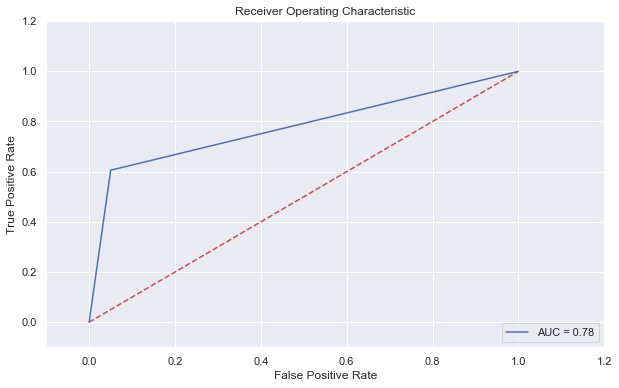

In [103]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, gbc_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [104]:
from sklearn.ensemble import AdaBoostClassifier

In [105]:
abc = AdaBoostClassifier(n_estimators = 100)

In [106]:
abc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [107]:
abc_pred = abc.predict(X_test)

In [108]:
abc_metrics = model_eval(y_test, abc_pred)
abc_metrics

{'accuracy': 0.8663123892883192,
 'precision': 0.7843680709534369,
 'recall': 0.6128194023386747,
 'f_measure': 0.688062241672745,
 'specificity': 0.9466245883644346,
 'error_rate': 0.13368761071168078,
 'confusion_matrix': array([[6899,  389],
        [ 894, 1415]])}

In [109]:
scores = cross_val_score(abc, X_train, y_train, cv=5)
print(scores)
print('Testing Accuracy with CV: ', scores.mean())

[0.86311539 0.8554311  0.87132066 0.87091312 0.86283705]
Testing Accuracy with CV:  0.8647234631456844


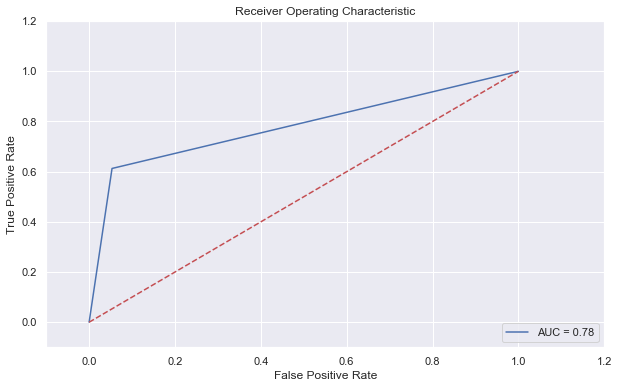

In [110]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, abc_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)



plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [111]:
from sklearn.svm import SVC

In [112]:
svc = SVC(C = 10)

In [113]:
svc.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [114]:
svc_pred = svc.predict(X_test)

In [115]:
svc_metrics = model_eval(y_test, svc_pred)
svc_metrics

{'accuracy': 0.7978534958841305,
 'precision': 0.8423005565862709,
 'recall': 0.19662191424859246,
 'f_measure': 0.3188202247191011,
 'specificity': 0.9883369923161361,
 'error_rate': 0.20214650411586954,
 'confusion_matrix': array([[7203,   85],
        [1855,  454]])}

In [116]:
# CV
scores = cross_val_score(svc, X_train, y_train, cv=5)
print(scores)
print('Testing Accuracy with CV: ', scores.mean())

[0.79604064 0.79812451 0.80346444 0.8007034  0.79666536]
Testing Accuracy with CV:  0.798999670975875


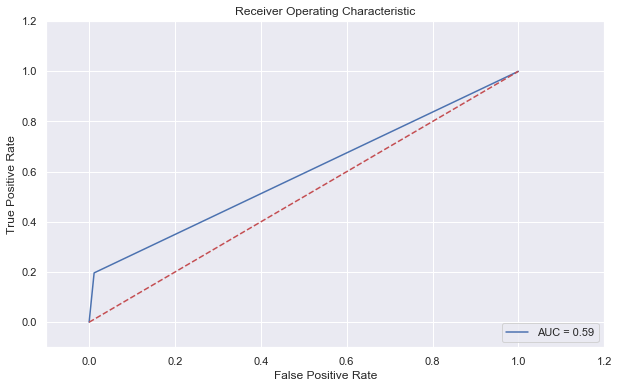

In [117]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, svc_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)



plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [118]:
from sklearn.naive_bayes import GaussianNB

In [119]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [120]:
gnb_pred = gnb.predict(X_test)

In [121]:
scores = cross_val_score(gnb, X_train, y_train, cv=5)
print(scores)
print('Testing Accuracy with CV: ', scores.mean())

[0.79004949 0.79369628 0.80346444 0.79887977 0.79210629]
Testing Accuracy with CV:  0.7956392546512702


In [122]:
gnb_metrics = model_eval(y_test, gnb_pred)
gnb_metrics

{'accuracy': 0.7954569136188392,
 'precision': 0.6638257575757576,
 'recall': 0.3035946297098311,
 'f_measure': 0.41664190193164935,
 'specificity': 0.9512897914379802,
 'error_rate': 0.2045430863811608,
 'confusion_matrix': array([[6933,  355],
        [1608,  701]])}

In [123]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != gnb_pred).sum()))

Number of mislabeled points out of a total 9597 points : 1963


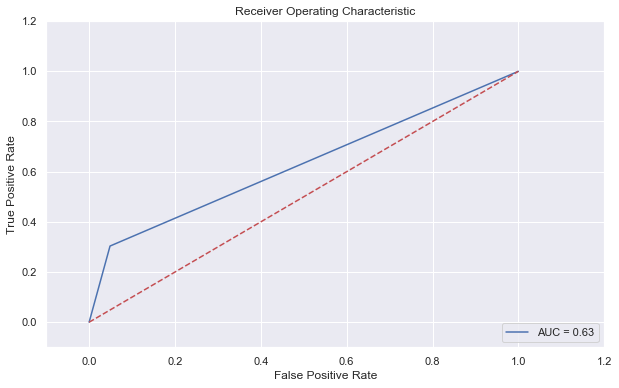

In [124]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, gnb_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)



plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [125]:
from sklearn.naive_bayes import BernoulliNB

In [126]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [127]:
bnb_pred = bnb.predict(X_test)

In [128]:
bnb_metrics = model_eval(y_test, bnb_pred)
bnb_metrics

{'accuracy': 0.8083776180056268,
 'precision': 0.5823405746320953,
 'recall': 0.7197921177999134,
 'f_measure': 0.6438117373619988,
 'specificity': 0.8364434687156971,
 'error_rate': 0.1916223819943732,
 'confusion_matrix': array([[6096, 1192],
        [ 647, 1662]])}

In [129]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != bnb_pred).sum()))

Number of mislabeled points out of a total 9597 points : 1839


In [130]:
scores = cross_val_score(bnb, X_train, y_train, cv=5)
print(scores)
print('Testing Accuracy with CV: ', scores.mean())

[0.80828341 0.80203178 0.81766085 0.80669532 0.80461118]
Testing Accuracy with CV:  0.8078565070721526


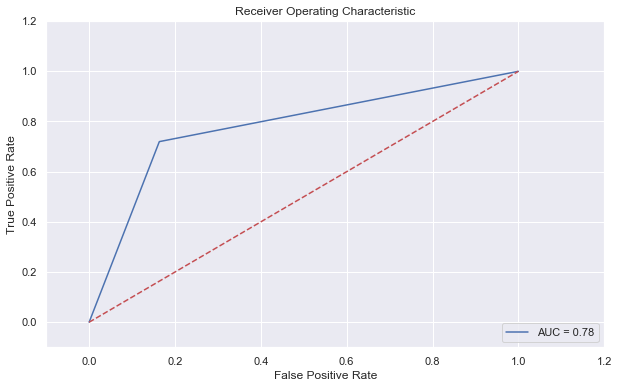

In [131]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, bnb_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)



plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [132]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='adam', alpha=1e-4,hidden_layer_sizes = (100,))

In [133]:
mlp.fit(X_train, y_train)
MLP_pred = mlp.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [134]:
mlp_metrics = model_eval(y_test, MLP_pred)
mlp_metrics

{'accuracy': 0.8285922684172137,
 'precision': 0.6238805970149254,
 'recall': 0.7241229969683846,
 'f_measure': 0.6702746041290839,
 'specificity': 0.8616904500548848,
 'error_rate': 0.17140773158278633,
 'confusion_matrix': array([[6280, 1008],
        [ 637, 1672]])}

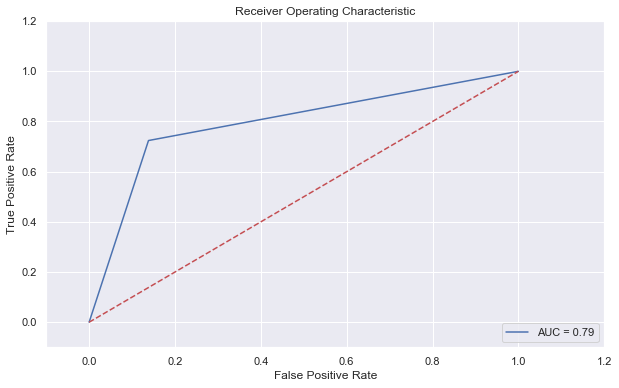

In [135]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, MLP_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)



plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

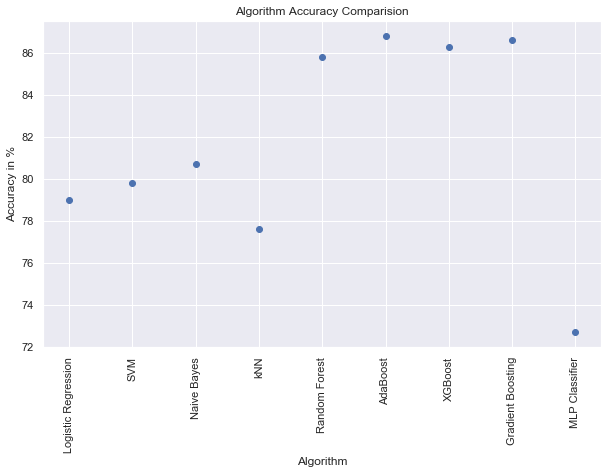

In [136]:
accuracy = [79, 79.8, 80.7, 77.6, 85.8, 86.8, 86.3, 86.6, 72.7]
algo_names = ['Logistic Regression', 'SVM', 'Naive Bayes' , 'kNN', 'Random Forest' , 'AdaBoost' , 'XGBoost' , 'Gradient Boosting', 'MLP Classifier']

plt.scatter(algo_names, accuracy)

plt.title('Algorithm Accuracy Comparision')
plt.xlabel('Algorithm')
plt.xticks(rotation=90)
plt.ylabel('Accuracy in %')
plt.grid(True)
plt.show()